In [20]:
# combination of random oversampling and undersampling for imbalanced classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
import sklearn
import datetime as dt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
df=pd.read_csv('/content/gdrive/MyDrive/train.csv')

In [ ]:
df.columns[8:18]
df.drop(columns=['GEOGRAPHIC_CLUSTER_K_0', 'GEOGRAPHIC_CLUSTER_K_1',
       'GEOGRAPHIC_CLUSTER_K_2', 'GEOGRAPHIC_CLUSTER_K_3',
       'GEOGRAPHIC_CLUSTER_K_4', 'GEOGRAPHIC_CLUSTER_K_5',
       'GEOGRAPHIC_CLUSTER_K_6', 'GEOGRAPHIC_CLUSTER_K_7',
       'GEOGRAPHIC_CLUSTER_K_8', 'GEOGRAPHIC_CLUSTER_K_9'], inplace=True)
df.drop(columns='CELL_TYPE_TRP', inplace=True)
df.drop(columns='SITE_ID', inplace=True)
target=df['aircon_sum_target_next14d']
df.drop(columns='aircon_sum_target_next14d', inplace=True)

In [18]:
df.columns

Index(['DATE', 'CELL_TYPE_Macro', 'CELL_TYPE_Mobil', 'CELL_TYPE_Tx site',
       'CELL_TYPE_micro', 'N_TRANSPORTED_SITES', 'aircon_sum_wo_prev7d',
       'aircon_sum_wo_prev14d', 'mean_temperature_prev7d',
       'max_temperature_prev7d',
       ...
       'skew_equipment_alarms_prev14d', 'skew_fire/smoke_alarms_prev14d',
       'skew_ge_alarms_prev14d', 'skew_power_alarms_prev14d',
       'skew_temperature_alarms_prev14d', 'kurt_equipment_alarms_prev14d',
       'kurt_fire/smoke_alarms_prev14d', 'kurt_ge_alarms_prev14d',
       'kurt_power_alarms_prev14d', 'kurt_temperature_alarms_prev14d'],
      dtype='object', length=123)

In [31]:
import datetime as dt

X_train=df
X_train['DATE'] = pd.to_datetime(X_train['DATE'])
X_train['DATE']=X_train['DATE'].map(dt.datetime.toordinal)

y_train=target
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

sel.get_support()

selected_feat= X_train.columns[(sel.get_support())]

print(len(selected_feat),selected_feat)

48 Index(['N_TRANSPORTED_SITES', 'aircon_sum_wo_prev7d', 'aircon_sum_wo_prev14d',
       'mean_temperature_prev7d', 'mean_temperature_prev3d',
       'mean_rain_mm_prev7d', 'max_rain_mm_prev7d', 'mean_humidity_prev7d',
       'max_humidity_prev7d', 'min_humidity_prev7d', 'mean_humidity_prev3d',
       'min_humidity_prev3d', 'mean_wind_speed_prev7d',
       'max_wind_speed_prev7d', 'mean_pressure_prev7d',
       'mean_temperature_f_next14d', 'max_temperature_f_next14d',
       'min_temperature_f_next14d', 'mean_temperature_f_next7d',
       'mean_rain_mm_f_next14d', 'max_rain_mm_f_next14d',
       'mean_rain_mm_f_next7d', 'max_rain_mm_f_next7d',
       'mean_humidity_f_next14d', 'max_humidity_f_next14d',
       'min_humidity_f_next14d', 'mean_humidity_f_next7d',
       'max_humidity_f_next7d', 'min_humidity_f_next7d',
       'mean_wind_speed_f_next14d', 'max_wind_speed_f_next14d',
       'mean_wind_speed_f_next7d', 'max_wind_speed_f_next7d',
       'mean_pressure_f_next14d', 'mean_press

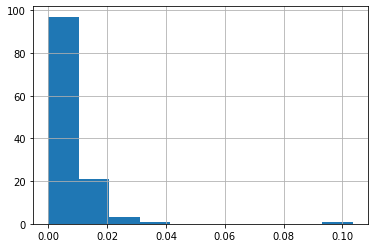

In [32]:
pd.Series(sel.estimator_.feature_importances_.ravel()).hist()

In [33]:
X=X_train[selected_feat]

X.shape[1]

48

In [34]:
import numpy as np
import matplotlib.pyplot as plt

importances = sel.estimator_.feature_importances_
indices = np.argsort(importances)[::-1]

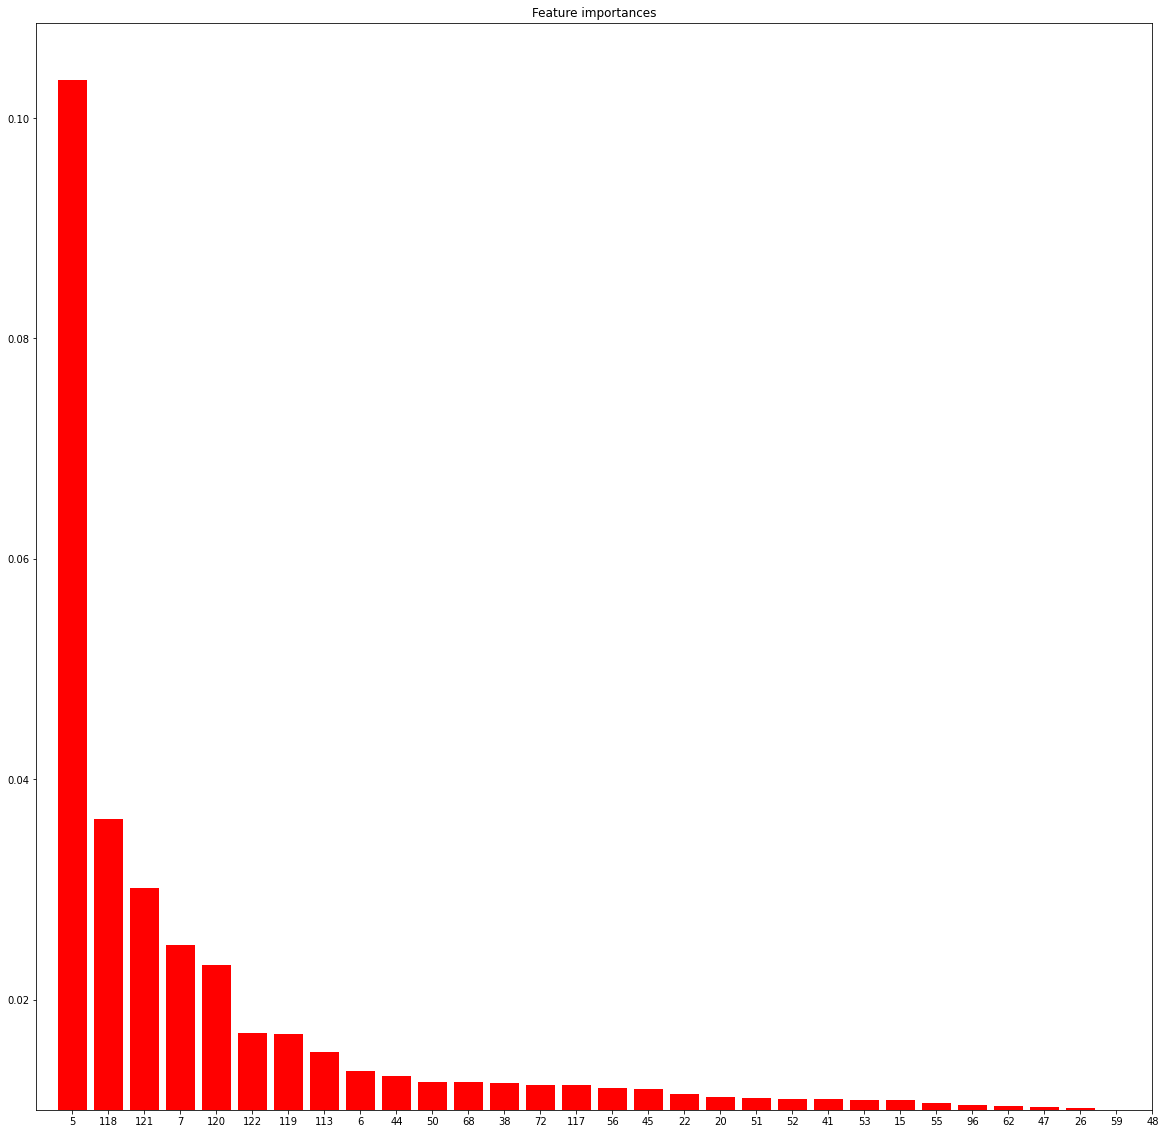

In [39]:
X=X_train
plt.figure(figsize=(20,20))

plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, 30])
plt.ylim(0.010)
plt.show()

In [42]:
indices30=indices[0:30]
indices30

array([  5, 118, 121,   7, 120, 122, 119, 113,   6,  44,  50,  68,  38,
        72, 117,  56,  45,  22,  20,  51,  52,  41,  53,  15,  55,  96,
        62,  47,  26,  59])

In [52]:
import numpy as np
a=np.sort(indices30)
a
not_sorted_X_train=X_train.iloc[:,a]
sorted_X_train=X_train.iloc[:,indices30]
sorted_X_train
sorted_X_train.columns

Index(['N_TRANSPORTED_SITES', 'kurt_equipment_alarms_prev14d',
       'kurt_power_alarms_prev14d', 'aircon_sum_wo_prev14d',
       'kurt_ge_alarms_prev14d', 'kurt_temperature_alarms_prev14d',
       'kurt_fire/smoke_alarms_prev14d', 'skew_equipment_alarms_prev14d',
       'aircon_sum_wo_prev7d', 'mean_rain_mm_f_next14d',
       'mean_humidity_f_next14d', 'equipment_sum_alarms_prev14d',
       'mean_temperature_f_next14d', 'temperature_sum_alarms_prev14d',
       'skew_temperature_alarms_prev14d', 'mean_wind_speed_f_next14d',
       'max_rain_mm_f_next14d', 'min_humidity_prev7d', 'mean_humidity_prev7d',
       'max_humidity_f_next14d', 'min_humidity_f_next14d',
       'mean_temperature_f_next7d', 'mean_humidity_f_next7d',
       'max_rain_mm_prev7d', 'min_humidity_f_next7d',
       'temperature_mean_persistance_prev7d', 'mean_pressure_f_next14d',
       'mean_rain_mm_f_next7d', 'mean_wind_speed_prev7d',
       'mean_wind_speed_f_next7d'],
      dtype='object')

Top30 features that will be used further

['N_TRANSPORTED_SITES', 'kurt_equipment_alarms_prev14d',
       'kurt_power_alarms_prev14d', 'aircon_sum_wo_prev14d',
       'kurt_ge_alarms_prev14d', 'kurt_temperature_alarms_prev14d',
       'kurt_fire/smoke_alarms_prev14d', 'skew_equipment_alarms_prev14d',
       'aircon_sum_wo_prev7d', 'mean_rain_mm_f_next14d',
       'mean_humidity_f_next14d', 'equipment_sum_alarms_prev14d',
       'mean_temperature_f_next14d', 'temperature_sum_alarms_prev14d',
       'skew_temperature_alarms_prev14d', 'mean_wind_speed_f_next14d',
       'max_rain_mm_f_next14d', 'min_humidity_prev7d', 'mean_humidity_prev7d',
       'max_humidity_f_next14d', 'min_humidity_f_next14d',
       'mean_temperature_f_next7d', 'mean_humidity_f_next7d',
       'max_rain_mm_prev7d', 'min_humidity_f_next7d',
       'temperature_mean_persistance_prev7d', 'mean_pressure_f_next14d',
       'mean_rain_mm_f_next7d', 'mean_wind_speed_prev7d',
       'mean_wind_speed_f_next7d']